# Assignment 58, Uniformly sampling SO(3)—1

Every unit quaternion - or versor - is equivalent to some member of $SO(3)$, with the equivalence given by the following mapping from a quaternion $Q$ to an equivalent rotation matrix $R(Q)$: 

$$R(Q) = \begin{bmatrix} 
             2(q_{0}^{2} + q_{1}^{2}) - 1 & 2(q_{1}q_{2} - q_{0}q_{3}) & 2(q_{1}q_{3} + q_{0}q_{2}) \\
             2(q_{1}q_{2} + q_{0}q_{3}) & 2(q_{0}^{2} + q_{2}^{2}) - 1 & 2(q_{2}q_{3} - q_{0}q_{1}) \\
             2(q_{1}q_{3} - q_{0}q_{2}) & 2(q_{2}q_{3} + q_{0}q_{1}) & 2(q_{0}^{2} + q_{3}^{2}) - 1
         \end{bmatrix}$$
         
The above thus presents us with an efficent way of generating random members of $SO(3)$. To wit, we first generate a random versor (i.e., unit quaternion), and then use the mapping above to transform it into the equaivlent matrix representation of the corresponding member of $SO(3)$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# set seed
np.random.seed(42)

# number of group elements
N = 10000

# map versors to corresponding rotation matrices
def to_matrix(q):
    return np.array([[2.0*(q[0]**2 + q[1]**2) - 1.0, 2.0*(q[1]*q[2] - q[0]*q[3]), 2.0*(q[1]*q[3] + q[0]*q[2])],
                     [2.0*(q[1]*q[2] + q[0]*q[3]), 2.0*(q[0]**2 + q[2]**2) - 1.0, 2.0*(q[2]*q[3] - q[0]*q[1])],
                     [2.0*(q[1]*q[3] - q[0]*q[2]), 2.0*(q[2]*q[3] + q[0]*q[1]), 2.0*(q[0]**2 + q[3]**2) - 1]])

# define a function on the matrix representations
# this is the sum over the abs values of the matrix elements
f = lambda M: np.sum(np.abs(M.flatten()))

f_R_values = [0]*N

f_R0_R_values = [0]*N

# pick one of the matrices at random to be R0
Q0 = np.random.normal(size=4)
NQ0 = (1.0 / np.sqrt(np.dot(Q0, Q0))) * Q0
R0 = to_matrix(NQ0)
               
for j in range(N):
    # random quaternion
    Q = np.random.normal(size=4)
    # normalized quaternion
    NQ = (1.0 / np.sqrt(np.dot(Q, Q))) * Q
    # equivalent rotation matrix R
    R = to_matrix(NQ)
    # value of f(R)
    f_R_values[j] = f(R)
    # value of f(R0 x R)
    f_R0_R_values[j] = f(R0 @ R)


def plot_hist(z, N):
    plt.hist(z, density = True, bins = int(np.sqrt(N)))
    plt.show()
    plt.close()

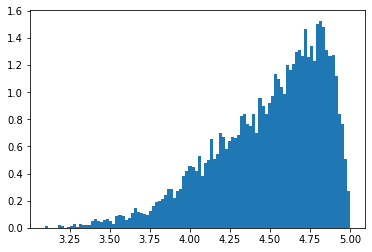

In [2]:
plot_hist(f_R_values, N)

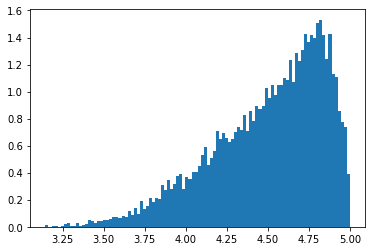

In [3]:
plot_hist(f_R0_R_values, N)

In [4]:
ks_2samp(f_R_values, f_R0_R_values)

KstestResult(statistic=0.0135, pvalue=0.32189015194890147)

The intuitive meaing of the Kolmogorov - Smirnov statistic is that it takes on the value of the largest absolute difference between the two empirical distributions above. Clearly, then, two distributions share greater similarlity the smaller the value of the statistic is (that is, the closer it is to zero). If the value of the statistic is *exactly* equal to zero, then the two distributions are in fact completely identical. 

The p - value above quantifies the probability of obtaining two empirical distributions at least as similar to the ones we actually obtained under the null hypothesis, which is here that the data in the two historgrams comes from *different* underlying generating probability densities. 

